In [ ]:
# Importar biblioteca necesaria
import pandas as pd

# Especificar el nombre del archivo Excel
archivo_excel = '/content/dataproyecto.xlsx'

In [ ]:
# Obtener la lista de nombres de hojas en el archivo Excel
nombres_hojas = pd.ExcelFile(archivo_excel).sheet_names

# Mostrar los nombres de las hojas
print("Nombres de las hojas en el archivo Excel:")
print(nombres_hojas)


Nombres de las hojas en el archivo Excel:
['mdi_personasdesaparecidas_pm_20', 'mdi_armasilicitas_pm_2023_enero', 'mdi_detenidosaprehendidos_pm_20', 'Hoja1']


In [ ]:
# Leer cada hoja del archivo Excel en un DataFrame separado
df_hoja1 = pd.read_excel(archivo_excel, sheet_name='mdi_personasdesaparecidas_pm_20')
df_hoja2 = pd.read_excel(archivo_excel, sheet_name='mdi_armasilicitas_pm_2023_enero')
df_hoja3 = pd.read_excel(archivo_excel, sheet_name='mdi_detenidosaprehendidos_pm_20')

# Puedes cambiar 'Nombre_Hoja1', 'Nombre_Hoja2', y 'Nombre_Hoja3' por los nombres reales de tus hojas

# Mostrar las primeras filas de cada DataFrame
print("Hoja 1:")
print(df_hoja1.head())

print("\nHoja 2:")
print(df_hoja2.head())

print("\nHoja 3:")
print(df_hoja3.head())


Hoja 1:
                        Provincia   Latitud   Longitud  Edad Aprox.    Sexo  \
0                ZAMORA CHINCHIPE -4.068053 -78.951322           16   MUJER   
1                      D.M. QUITO -0.218822 -78.513549           17  HOMBRE   
2                      D.M. QUITO -0.269090 -78.540015           17   MUJER   
3  SANTO DOMINGO DE LOS TSACHILAS  0.009167 -79.391605           39  HOMBRE   
4                      D.M. QUITO -0.175042 -78.474782           14   MUJER   

     Motivo Desaparción  Motivo Desaparción Obs. Fecha Desaparición  \
0  PROBLEMAS FAMILIARES  PROBLEMAS SENTIMENTALES         2023-08-28   
1              SIN_DATO                 SIN_DATO         2023-01-24   
2  PROBLEMAS FAMILIARES  PROBLEMAS SENTIMENTALES         2023-02-02   
3              SIN_DATO                 SIN_DATO         2023-02-01   
4    PROBLEMAS SOCIALES  INFLUENCIA DE AMISTADES         2023-03-16   

  Situación Actual Fecha Localización  
0       ENCONTRADO           5/9/2023  
1     DESA

In [ ]:
df_hoja1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Provincia                7021 non-null   object        
 1   Latitud                  7021 non-null   float64       
 2   Longitud                 7021 non-null   float64       
 3   Edad Aprox.              7021 non-null   int64         
 4   Sexo                     7021 non-null   object        
 5   Motivo Desaparción       7021 non-null   object        
 6   Motivo Desaparción Obs.  7021 non-null   object        
 7   Fecha Desaparición       7021 non-null   datetime64[ns]
 8   Situación Actual         7021 non-null   object        
 9   Fecha Localización       7021 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 548.6+ KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd

# Leer los datos
df = pd.read_excel('/content/dataproyecto.xlsx', sheet_name='mdi_personasdesaparecidas_pm_20')

# Preprocesamiento de datos
le = LabelEncoder()
df['Motivo Desaparción'] = le.fit_transform(df['Motivo Desaparción'])
df['Sexo'] = le.fit_transform(df['Sexo'])
df['Situación Actual'] = le.fit_transform(df['Situación Actual'])

# Convertir la columna 'Fecha Localización' a tipo datetime
#df['Fecha Localización'] = pd.to_datetime(df['Fecha Localización'], errors='coerce')
df['Fecha Localización'] = pd.to_datetime(df['Fecha Localización'], format='%d/%m/%Y', errors='coerce')


# Eliminar filas con fechas de localización nulas
df = df.dropna(subset=['Fecha Localización'])

# Codificación one-hot para la columna 'Provincia'
df = pd.get_dummies(df, columns=['Provincia'], drop_first=True)

# Seleccionar características y variable objetivo
X = df[['Latitud', 'Longitud', 'Edad Aprox.', 'Sexo', 'Motivo Desaparción', 'Situación Actual'] + list(df.columns[11:])]
y = df['Fecha Localización']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construir y entrenar el modelo de regresión (Random Forest en este caso)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Convertir las fechas reales a formato numérico compatible
y_test_numeric = y_test.astype('int64') // 10**9  # Convertir a segundos desde la época (epoch)

# Calcular el timedelta entre las predicciones y las etiquetas reales
timedelta_predictions = predictions - y_test_numeric.values

# Imprimir la diferencia de tiempo promedio
print(f'Mean Absolute Timedelta: {timedelta_predictions.mean()}')

Mean Absolute Timedelta: 1.6877557914717384e+18


In [ ]:
mean_absolute_timedelta_days = 1.6877123501817436e+18 / (86400 * 1e9)
print(f'Mean Absolute Timedelta (en días): {mean_absolute_timedelta_days:.2f} días')


Mean Absolute Timedelta (en días): 19533.71 días


# MODEL 2

In [ ]:
df_hoja2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9237 entries, 0 to 9236
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   subtipo_objeto_robado  9237 non-null   object        
 1   nombre_objeto          9237 non-null   object        
 2   fecha_evento           9237 non-null   datetime64[ns]
 3   nombre_provincia       9237 non-null   object        
 4   tipo_delito            9237 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 360.9+ KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Leer los datos
df_delitos = pd.read_excel('/content/dataproyecto.xlsx', sheet_name='mdi_armasilicitas_pm_2023_enero')

# Preprocesamiento de datos
le = LabelEncoder()
df_delitos['subtipo_objeto_robado'] = le.fit_transform(df_delitos['subtipo_objeto_robado'])
df_delitos['nombre_objeto'] = le.fit_transform(df_delitos['nombre_objeto'])
df_delitos['nombre_provincia'] = le.fit_transform(df_delitos['nombre_provincia'])
df_delitos['tipo_delito'] = le.fit_transform(df_delitos['tipo_delito'])

# Excluir la columna de fechas para el modelo de clasificación
X_delitos = df_delitos[['subtipo_objeto_robado', 'nombre_objeto', 'nombre_provincia']]
y_delitos = df_delitos['tipo_delito']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_delitos, X_test_delitos, y_train_delitos, y_test_delitos = train_test_split(X_delitos, y_delitos, test_size=0.2, random_state=42)

# Construir y entrenar el modelo de clasificación (Random Forest en este caso)
model_delitos = RandomForestClassifier()
model_delitos.fit(X_train_delitos, y_train_delitos)

# Realizar predicciones en el conjunto de prueba
predictions_delitos = model_delitos.predict(X_test_delitos)

# Evaluar el modelo
accuracy = accuracy_score(y_test_delitos, predictions_delitos)
print(f'Accuracy: {accuracy:.2f}')

# Imprimir el reporte de clasificación
print("Classification Report:")
print(classification_report(y_test_delitos, predictions_delitos))


Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00        20
           9       0.15      0.02      0.03       221
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         9
          19       0.00      0.00      0.00         3
          20       0.00      0.00      0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## MODELO 3

In [ ]:
df_hoja3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68662 entries, 0 to 68661
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   codigo_iccs                  67672 non-null  object        
 1   tipo                         68662 non-null  object        
 2   estado_civil                 68662 non-null  object        
 3   estatus_migratorio           68662 non-null  object        
 4   edad                         68662 non-null  object        
 5   sexo                         68662 non-null  object        
 6   genero                       68662 non-null  object        
 7   nacionalidad                 68662 non-null  object        
 8   autoidentificacion_etnica    68662 non-null  object        
 9   numero_detenciones           68662 non-null  int64         
 10  nivel_de_instruccion         68662 non-null  object        
 11  condicion                    68662 non-nu

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from tensorflow import keras
from tensorflow.keras import layers

# Leer los datos
df_detenciones = pd.read_excel('/content/dataproyecto.xlsx', sheet_name='mdi_detenidosaprehendidos_pm_20')

# Preprocesamiento de datos
le = LabelEncoder()

# Iterar sobre todas las columnas categóricas
for column in df_detenciones.select_dtypes(include=['object']).columns:
    df_detenciones[column] = le.fit_transform(df_detenciones[column])

# Eliminar filas con valores no numéricos
df_detenciones_numeric = df_detenciones.dropna(subset=['edad', 'numero_detenciones'])
df_detenciones_numeric = df_detenciones_numeric[df_detenciones_numeric['edad'] != 'SIN DATO']

# Seleccionar características y variable objetivo
X_detenciones = df_detenciones_numeric.drop(columns=['presunta_modalidad', 'fecha_detencion_aprehension'])
y_detenciones = df_detenciones_numeric['presunta_modalidad']

# Manejar valores faltantes
X_detenciones = X_detenciones.fillna(0)  # Puedes ajustar la estrategia de llenado según tu caso

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_detenciones, X_test_detenciones, y_train_detenciones, y_test_detenciones = train_test_split(X_detenciones, y_detenciones, test_size=0.2, random_state=42)

# Escalar los datos (excluyendo la columna de fechas)
scaler = StandardScaler()
X_train_detenciones_scaled = scaler.fit_transform(X_train_detenciones)
X_test_detenciones_scaled = scaler.transform(X_test_detenciones)

# Crear la arquitectura de la red neuronal mejorada
model_detenciones = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_detenciones_scaled.shape[1],)),
    layers.Dropout(0.5),  # Agrega dropout para reducir el sobreajuste
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(len(y_detenciones.unique()), activation='softmax')
])

# Compilar el modelo
model_detenciones.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model_detenciones.fit(X_train_detenciones_scaled, y_train_detenciones, epochs=50, batch_size=32, validation_split=0.25)



Epoch 1/50
1288/1288 [==============================] - 4s 3ms/step - loss: 0.8403 - accuracy: 0.7883 - val_loss: 0.5394 - val_accuracy: 0.8415
Epoch 2/50
1288/1288 [==============================] - 3s 3ms/step - loss: 0.5582 - accuracy: 0.8296 - val_loss: 0.4622 - val_accuracy: 0.8539
Epoch 3/50
1288/1288 [==============================] - 5s 4ms/step - loss: 0.4848 - accuracy: 0.8435 - val_loss: 0.4041 - val_accuracy: 0.8686
Epoch 4/50
1288/1288 [==============================] - 3s 3ms/step - loss: 0.4398 - accuracy: 0.8569 - val_loss: 0.3688 - val_accuracy: 0.8758
Epoch 5/50
1288/1288 [==============================] - 3s 3ms/step - loss: 0.4099 - accuracy: 0.8655 - val_loss: 0.3473 - val_accuracy: 0.8817
Epoch 6/50
1288/1288 [==============================] - 4s 3ms/step - loss: 0.3880 - accuracy: 0.8716 - val_loss: 0.3343 - val_accuracy: 0.8866
Epoch 7/50
1288/1288 [==============================] - 4s 3ms/step - loss: 0.3707 - accuracy: 0.8771 - val_loss: 0.3233 - val_accuracy:

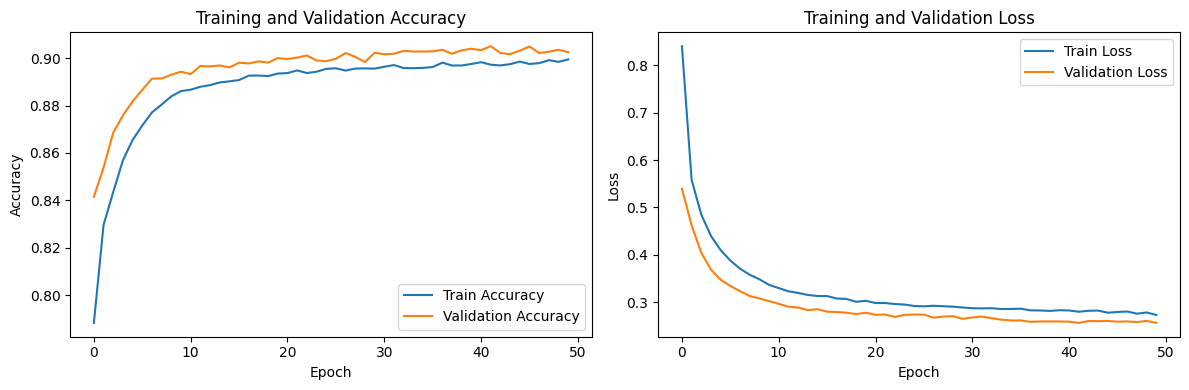

In [ ]:
import matplotlib.pyplot as plt

# Obtener las métricas de rendimiento y pérdida durante el entrenamiento
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Crear gráficos
plt.figure(figsize=(12, 4))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Mostrar los gráficos
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Leer los datos
df_detenciones = pd.read_excel('/content/dataproyecto.xlsx', sheet_name='mdi_detenidosaprehendidos_pm_20')

# Preprocesamiento de datos
le = LabelEncoder()

# Iterar sobre todas las columnas categóricas
for column in df_detenciones.select_dtypes(include=['object']).columns:
    df_detenciones[column] = le.fit_transform(df_detenciones[column])

# Eliminar filas con valores no numéricos
df_detenciones_numeric = df_detenciones.dropna(subset=['edad', 'numero_detenciones'])
df_detenciones_numeric = df_detenciones_numeric[df_detenciones_numeric['edad'] != 'SIN DATO']

# Seleccionar características y variable objetivo
X_detenciones = df_detenciones_numeric.drop(columns=['presunta_modalidad', 'fecha_detencion_aprehension'])
y_detenciones = df_detenciones_numeric['presunta_modalidad']

# Manejar valores faltantes
X_detenciones = X_detenciones.fillna(0)  # Puedes ajustar la estrategia de llenado según tu caso

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_detenciones, X_test_detenciones, y_train_detenciones, y_test_detenciones = train_test_split(X_detenciones, y_detenciones, test_size=0.2, random_state=42)

# Escalar los datos (excluyendo la columna de fechas)
scaler = StandardScaler()
X_train_detenciones_scaled = scaler.fit_transform(X_train_detenciones)
X_test_detenciones_scaled = scaler.transform(X_test_detenciones)

# Construir y entrenar el modelo de clasificación (Random Forest en este caso)
model_detenciones = RandomForestClassifier()
model_detenciones.fit(X_train_detenciones_scaled, y_train_detenciones)

# Realizar predicciones en el conjunto de prueba
y_pred_detenciones = model_detenciones.predict(X_test_detenciones_scaled)

# Evaluar el modelo
accuracy = accuracy_score(y_test_detenciones, y_pred_detenciones)
print(f'Accuracy: {accuracy:.2f}')

# Imprimir el reporte de clasificación
print("Classification Report:")
print(classification_report(y_test_detenciones, y_pred_detenciones))


Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.20      0.33         5
           2       0.00      0.00      0.00         1
           3       0.88      0.78      0.82         9
           6       0.78      0.28      0.41        25
           7       0.00      0.00      0.00         7
          16       0.00      0.00      0.00         1
          17       0.98      1.00      0.99       177
          18       0.00      0.00      0.00         3
          19       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          24       0.99      0.98      0.98        83
          25       0.89      0.99      0.94       193
          26       1.00      0.50      0.67         2
          30       0.89      0.57      0.70        14
          32       0.00      0.00      0.00         1
          34       0.50      1.00      0.67         1
          35       0.57      0.29      0.38

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
